# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import requests
import json
import re

# Data Gathering

Source File #1

Read the given CSV file.

In [2]:
# Import twitter_archive_enhanced CSV file into a DF.
twtr_archv_df = pd.read_csv('twitter_archive_enhanced.csv')
twtr_archv_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Source File #2

Download the tweet image predictions, which is hosted on Udacity's servers using the Requests library and the URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
# Download the TSV file using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# Import the tweet image predictions TSV file into a DataFrame
img_prdctns_df = pd.read_csv('image_predictions.tsv', sep='\t')
img_prdctns_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Source File #3

Twitter API Data!

This can be downloaded as tweet_json.txt using the code twitter_api.py. For this I would have had to create a twitter developer account, which I want to avoid. So, I decided to download this data from Udacity provided link. I chose to do this because I have worked wiy=th APIs in the past while working on Full Stack projects.

In [5]:
# Used the following code snippet to check if I could read the json file
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        print(json.dumps(json_data, indent=2))

{
  "created_at": "Tue Aug 01 16:23:56 +0000 2017",
  "id": 892420643555336193,
  "id_str": "892420643555336193",
  "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  "truncated": false,
  "display_text_range": [
    0,
    85
  ],
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [],
    "media": [
      {
        "id": 892420639486877696,
        "id_str": "892420639486877696",
        "indices": [
          86,
          109
        ],
        "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "url": "https://t.co/MgUWQ76dJU",
        "display_url": "pic.twitter.com/MgUWQ76dJU",
        "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1",
        "type": "photo",
        "sizes": {
          "large": {
            "w": 540,
            "h":

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
# Option 1
#tweets_df = pd.read_json('tweet-json.txt', lines=True)
#tweets_df.head()

In [7]:
# Option 2 - will use this
# https://knowledge.udacity.com/questions/66949#66975

selected_attr = []

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                              'display_text_range': json_data['display_text_range'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],
                             'timestamp': json_data['created_at']})
       
tweets_df = pd.DataFrame(selected_attr, columns = ['tweet_id', 'display_text_range', 'favorites', 'retweets', 'timestamp'])

In [8]:
tweets_df.head()

,tweet_id,display_text_range,favorites,retweets,timestamp
0,892420643555336193,"[0, 85]",39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,"[0, 138]",33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,"[0, 121]",25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,"[0, 79]",42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,"[0, 138]",41048,9774,Sat Jul 29 16:00:24 +0000 2017


# Assessing Data

Gather information about data from each of the 3 sources.

Source #1

In [9]:
# Look at the data for visual assessment
twtr_archv_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# DF information
twtr_archv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

twtr_archv_df column description (based on column name and visual inspection of data):

 - tweet_id: unique identifier for each Tweet
 - in_reply_to_status_id: for reply Tweets, this field is the integer representation of the original Tweet ID
 - in_reply_to_user_id: for reply Tweets, this field is the integer representation of original Tweet’s author ID
 - timestamp: time of Tweet creation
 - source: device used to post the Tweet, e.g., Twitter for Android, Twitter for iPhone, Twitter Web Client
 - text: Tweet content
 - retweeted_status_id: for retweets, this field is the integer representation of the original Tweet ID
 - retweeted_status_user_id: for retweets, this field is the integer representation of the original Tweet’s author ID
 - retweeted_status_timestamp: time of retweet
 - expanded_urls: tweet URL
 - rating_numerator: numerator of the rating of a dog. This value is almost always greater than 10
 - rating_denominator: denominator of the rating of a dog. This value is almost always have a denominator of 10
 - name: name of the dog
 - doggo: a dog "stage"
 - floofer: a dog "stage"
 - pupper: a dog "stage"
 - puppo: a 4 dog "stage"

In [11]:
# Column Statistics
twtr_archv_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Count number of non-'None' values in columns 'doggo', 'floofer', 'pupper', 'puppo'
(twtr_archv_df.loc[:,'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [13]:
# Count number of cells in the column `text` with values containing texts doggo, floofer, pupper, and puppo
for column in twtr_archv_df.columns[-4:]:
    print(column, twtr_archv_df.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [14]:
# Let's look at all Dog names!
twtr_archv_df.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Lola            10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Toby             7
Bailey           7
an               7
Daisy            7
Buddy            7
Koda             6
Milo             6
Rusty            6
Oscar            6
Scout            6
Stanley          6
Dave             6
Bella            6
Jack             6
Jax              6
Leo              6
Gus              5
              ... 
Maude            1
Loomis           1
Harnold          1
Mosby            1
Akumi            1
Mac              1
Tonks            1
Pavlov           1
Jeremy           1
Marvin           1
Naphaniel        1
Dwight           1
Shiloh           1
Ferg             1
Strudel          1
Stark            1
Napolean         1
Finnegus         1
Keet             1
Maya             1
Rumble           1
Livvie      

Source #2 

In [15]:
# Look at the data for visual assessment
img_prdctns_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
img_prdctns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


img_prdctns_df column description (based on column name and visual inspection of data):

 - tweet_id: unique identifier for each Tweet
 - jpg_url: dog image URL
 - img_num: image number corresponding to the most confident prediction (numbered 1 to 4 as each Tweet can have up to 4 images)
 - p1: algorithm's 1st prediction for the image in the Tweet
 - p1_conf: confidence of the algorithm in its 1st prediction
 - p1_dog: boolean to flag if the 1st prediction is a "breed" of dog
 - p2: algorithm's 2nd prediction for the image in the Tweet
 - p2_conf: confidence of the algorithm in its 2nd prediction
 - p2_dog: boolean to flag if the 2nd prediction is a "breed" of dog
 - p3: algorithm's 3rd prediction for the image in the Tweet
 - p3_conf: confidence of the algorithm in its 3rd prediction
 - p3_dog: boolean to flag if the 3rd prediction is a "breed" of dog

Source #3

In [17]:
# Look at the data for visual assessment
tweets_df

,tweet_id,display_text_range,favorites,retweets,timestamp
0,892420643555336193,"[0, 85]",39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,"[0, 138]",33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,"[0, 121]",25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,"[0, 79]",42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,"[0, 138]",41048,9774,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,"[0, 138]",20562,3261,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,"[0, 140]",12041,2158,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,"[0, 118]",56848,16716,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,"[0, 122]",28226,4429,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,"[0, 133]",32467,7711,Wed Jul 26 15:59:51 +0000 2017


In [18]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id              2354 non-null int64
display_text_range    2354 non-null object
favorites             2354 non-null int64
retweets              2354 non-null int64
timestamp             2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


tweets_df column description (based on column name and visual inspection of data):

 - tweet_id: unique identifier for each Tweet
 - retweets: number of times a Tweet is retweeted
 - display_text_range: range to identify the start and end of each Tweet
 - favorites: number of times a Tweet is liked
 - timestamp: timestamp of a Tweet

## Observations

#### (for Source #1: Archive Data, Source #2: Predictions Data, Source #3: API Data)


### Quality

* (Archive Data) Retweets are included in the dataset. This means there are duplicates.
* (Predictions Data) The lower number of entries in Predictions DF compared to Archive DF means that some posts don't have images
* (Archive Data) Incompatible data types - in_reply_to_status_id and in_reply_to_user_id must be integer; and timestamp must be datetime
* (Archive Data) source column must tell us the source of the tweet and not have any unnecessary HTML tags
* (Archive Data) text column should contain only introduction and rating and show full text, which is not the case. It also includes a short version of some link
* (Archive Data) rating_denominator column has values other than 10
* (Archive Data) rating_numerator column has values less than 10
* (Archive Data) Incorrect Dog names, e.g., a, an, etc.
* (Archive Data) More than 1 stage (doggo, floofer, pupper or puppo) applies to some Dogs


### Tidiness

* (Archive Data) doggo, floofer, pupper and puppo columns in the table should, ideally, be merged into one column called 'stage'
* (Predictions Data) p1, p2 and p3 columns in the table should, ideally be merged into one column called 'breed' and then merged with Archive Data
* (API Data) retweets and favorites columns from the table should be joined with archive data table


# Cleaning Data

In [19]:
# Create a copy of all the DFs. We will perform cleaning actions on these copies.
cln_twtr_archv_df = twtr_archv_df.copy()
cln_img_prdctns_df = img_prdctns_df.copy()
cln_tweets_df = tweets_df.copy()
cln_tweets_df.rename(columns={'id': 'tweet_id'}, inplace=True)

##### Quality Observation 1 

 - Retweets are included in the dataset. This means there are duplicates.

##### Define

Keep only original tweets and NOT retweets (i.e. retweeted_status_id = NULL). Ignore the rest.

##### Code

In [20]:
cln_twtr_archv_df = cln_twtr_archv_df[cln_twtr_archv_df.retweeted_status_id.isnull()]

##### Test

In [21]:
len(cln_twtr_archv_df[cln_twtr_archv_df.retweeted_status_id.isnull() == False])

0

##### Quality Observation 2

 - The lower number of entries in Predictions DF compared to Archive DF means that some posts don't have images

##### Define

Keep only those records in arc_df table whose tweet_id exists in img_df table

##### Code

In [22]:
cln_twtr_archv_df = cln_twtr_archv_df[cln_twtr_archv_df.tweet_id.isin(cln_img_prdctns_df.tweet_id)]

##### Test

In [23]:
len(cln_twtr_archv_df[~cln_twtr_archv_df.tweet_id.isin(cln_img_prdctns_df.tweet_id)])

0

This next step makes our data tidy!

Archive Data table without any duplicates (i.e. retweets) has empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns. So, these columns which can be dropped.

In [24]:
cln_twtr_archv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

##### Define

Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from cln_twtr_archv_df.

##### Code

In [25]:
cln_twtr_archv_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [26]:
cln_twtr_archv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


##### Quality Observation 3

 - Incompatible data types - in_reply_to_status_id and in_reply_to_user_id must be integer; and timestamp must be datetime

##### Define

Convert in_reply_to_status_id and in_reply_to_user_id to integer.
Convert timestamp to datetime.

##### Code

In [27]:
cln_twtr_archv_df.in_reply_to_status_id = cln_twtr_archv_df.in_reply_to_status_id.fillna(0)
cln_twtr_archv_df.in_reply_to_status_id = cln_twtr_archv_df.in_reply_to_status_id.astype(np.int64)

cln_twtr_archv_df.in_reply_to_user_id = cln_twtr_archv_df.in_reply_to_user_id.fillna(0)
cln_twtr_archv_df.in_reply_to_user_id = cln_twtr_archv_df.in_reply_to_user_id.astype(np.int64)

cln_twtr_archv_df.timestamp = pd.to_datetime(cln_twtr_archv_df.timestamp)

##### Test

In [28]:
cln_twtr_archv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 233.7+ KB


##### Quality Observation 4

 - source column must tell us the source of the tweet and not have any unnecessary HTML tags

##### Define

Extract the appropriate 'source' values by stripping down HTML tags.

##### Code

In [29]:
cln_twtr_archv_df.source = cln_twtr_archv_df.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

##### Test

In [30]:
# Visual
cln_twtr_archv_df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,0,0,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,0,0,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,0,0,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,0,0,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,0,0,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [31]:
# Programmatic
cln_twtr_archv_df.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

##### Quality Observation 5

- text column should contain only introduction and rating and show full text, which is not the case. It also includes a short version of some link

##### Define

Extract tweet content from text column using display_text_range column of tweets_df.

##### Code

In [32]:
# head(5) text values before cleanup
print(cln_twtr_archv_df.iloc[0].text)
print(cln_twtr_archv_df.iloc[1].text)
print(cln_twtr_archv_df.iloc[2].text)
print(cln_twtr_archv_df.iloc[3].text)
print(cln_twtr_archv_df.iloc[4].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f


In [33]:
# Add display_text_range column of tweets_df to cln_twtr_archv_df
cln_twtr_archv_df = pd.merge(cln_twtr_archv_df, tweets_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [34]:
# Use display_text_range of to extract relevant tweet content
for i, row in cln_twtr_archv_df.iterrows():
    text_range = row.display_text_range
    tweet_text = row.text[text_range[0]:text_range[1]]
    cln_twtr_archv_df.set_value(i, 'text', tweet_text)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


##### Test

In [35]:
# head(5) text values after cleanup
print(cln_twtr_archv_df.iloc[0].text)
print(cln_twtr_archv_df.iloc[1].text)
print(cln_twtr_archv_df.iloc[2].text)
print(cln_twtr_archv_df.iloc[3].text)
print(cln_twtr_archv_df.iloc[4].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


##### Quality Observation 6

 - rating_denominator column has values other than 10

##### Define

When 'rating_denominator > 10 and divisible by 10', divide rating_numerator and rating_denominator by quotient1 of (rating_denominator/10).
 - If rating_numerator is divisible by quotient1, update the rating_numerator value with the resultant quotient2.

For all the remaining records, check the text column for fractions with denominator = 10. 
 - When denominator = 10, update rating_denominator to 10. 
 - Also, update rating_numerator with the numerator value of this fraction from the text column.
 
###### Note: 
 - We are effectively fixing all the numerators and denominators when denominator >= 10.
 - We are not considering denominator < 10 as we have no way of fixing that.

##### Code

In [36]:
# Regex to find fractions in text column
reg_ex = "\s*(\d+([.]\d+)?([/]\d+))"

# Python function that will match regex pattern and return an array of fractions
# https://docs.python.org/2/library/re.html
def tokens(x):
  return [m.group(1) for m in re.finditer(reg_ex, x)]

In [37]:
# Iterate through all records for which rating_denominator != 10
for i, row in cln_twtr_archv_df[cln_twtr_archv_df.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # Case 1: rating_denominator > 10 and divisible by 10
    if d > 10 and d%10 == 0:
        divisor = d/10 # this divisor is quotient1
        n = row.rating_numerator
        
        # if rating_numerator > 10 and is also divisible by the divisor
        if n%divisor == 0:
            cln_twtr_archv_df.set_value(i, 'rating_denominator', 10) # reassign rating_denominator as 10
            cln_twtr_archv_df.set_value(i, 'rating_numerator', int(n/divisor)) # reassign rating_numerator as quotient2 of rating_numerator/divisor
    
    # Case 2: remaining records
    else:
        # extract ratings (pattern matches) from 'text' using tokens function
        ratings = tokens(row.text)
        # iterate through all the ratings
        for rating in ratings:
            # if denominator = 10
            if rating.split('/')[1] == '10':
                # update rating_denominator as 10
                cln_twtr_archv_df.set_value(i, 'rating_denominator', 10)
                # reassign rating_numerator as the numerator value of this rating
                cln_twtr_archv_df.set_value(i, 'rating_numerator', int(round(float(rating.split('/')[0]))))
                break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


##### Test

In [38]:
# Count different rating_denominator values
cln_twtr_archv_df.rating_denominator.value_counts()

10    1993
7        1
Name: rating_denominator, dtype: int64

##### Quality Observation 7

 - rating_numerator column has values less than 10

##### Define

For the records with rating_numerator <= 10:
 - check if 'text' contains a fraction whose denominator is 10:
    - If so, update rating_numerator with the numerator value of this fraction
    
Also include records with very large rating_numerator (>15) in this search, to cover all the base.
 - We have already addressed large numerators while fixing the denominator above, by method of division. But, we could have genuinely missed the erroreneous records for incorrect fraction selection.
This is just a last pass to fix the ratings.    

##### Code

In [39]:
# Before values of various numerators
cln_twtr_archv_df[(cln_twtr_archv_df.rating_numerator <= 10) | (cln_twtr_archv_df.rating_numerator > 15)].rating_numerator.value_counts().sort_index()

0         2
1         4
2        10
3        19
4        15
5        33
6        32
7        51
8        95
9       152
10      422
24        1
26        1
27        1
75        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [40]:
# Iterating through 'text' to find correct values, if they exist
for i, row in cln_twtr_archv_df[(cln_twtr_archv_df.rating_numerator <= 10) | (cln_twtr_archv_df.rating_numerator > 15)].iterrows():
    ratings = tokens(row.text)
    for rating in ratings:        
        if rating.split('/')[1] == '10':
            n = int(round(float(rating.split('/')[0])))
            if (row.rating_numerator == 10 and n > 10) or (row.rating_numerator != 10 and n >= 10):
                cln_twtr_archv_df.set_value(i, 'rating_numerator', n)
                break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


##### Test

In [41]:
# After values for the numerators
cln_twtr_archv_df[(cln_twtr_archv_df.rating_numerator <= 10) | (cln_twtr_archv_df.rating_numerator > 15)].rating_numerator.value_counts().sort_index()

0         2
1         4
2         9
3        19
4        14
5        31
6        32
7        51
8        94
9       152
10      421
24        1
420       1
1776      1
Name: rating_numerator, dtype: int64

##### Quality Observation 8

 - Incorrect Dog names, e.g., a, an, etc.

##### Define

Looks like incorrect dog names are not nouns and hence start with a lower case alphabet. Replace all lowercase 'name' values 'None' (as 'None' already exists in the list).

##### Code

In [42]:
cln_twtr_archv_df['name'][cln_twtr_archv_df['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Test

In [43]:
# Let's look at all Dog names!
cln_twtr_archv_df.name.value_counts()

None         644
Charlie       11
Oliver        10
Cooper        10
Lucy          10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           7
Toby           7
Daisy          7
Jax            6
Bella          6
Bo             6
Stanley        6
Koda           6
Louis          5
Leo            5
Oscar          5
Bailey         5
Scout          5
Chester        5
Milo           5
Buddy          5
Rusty          5
Dave           5
Sophie         4
Larry          4
Clark          4
            ... 
Kathmandu      1
Skye           1
DonDon         1
Sora           1
Barclay        1
Margo          1
Jeb            1
Jim            1
Ralpher        1
Boots          1
Bayley         1
Kyro           1
Brudge         1
Clyde          1
Karll          1
Bell           1
Tyrus          1
Link           1
Chelsea        1
Tilly          1
Sonny          1
Chadrick       1
Marq           1
Bert           1
Rolf           1
Farfle         1
Leela          1
Fabio         

##### Quality Observation 9

 - More than 1 stage (doggo, floofer, pupper or puppo) applies to some Dogs

##### Define

There is a record with both 'doggo' and 'puppo' identified as Dog's stage. There may be others such records.

 - We will read such records (if < 20) and  assign a dog stage for each of them. 
 - When Dog stage is not clear, we will set all values as None.

In [44]:
for i, row in cln_twtr_archv_df[((cln_twtr_archv_df.doggo != 'None') & (cln_twtr_archv_df.floofer != 'None'))
                   | ((cln_twtr_archv_df.doggo != 'None') & (cln_twtr_archv_df.pupper != 'None'))
                   | ((cln_twtr_archv_df.doggo != 'None') & (cln_twtr_archv_df.puppo != 'None'))
                   | ((cln_twtr_archv_df.floofer != 'None') & (cln_twtr_archv_df.pupper != 'None'))
                   | ((cln_twtr_archv_df.floofer != 'None') & (cln_twtr_archv_df.puppo != 'None'))
                   | ((cln_twtr_archv_df.pupper != 'None') & (cln_twtr_archv_df.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs

817777686764523521 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo)

808106460588765185 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time

802265048156610565 Like doggo, like pupper version 2. Both 11/10

801115127852503040 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine

785639753186217984 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously

75979342226174

##### Code

855851453814013952 - is a puppo, set doggo = none

854010172552949760 - is a floofer, set doggo = none

817777686764523521 - is a doggo, set pupper = none

808106460588765185 - none, set pupper and doggo = none

802265048156610565 - none, set pupper and doggo = none

801115127852503040 - is a pupper, set doggo = none

785639753186217984 - ia a doggo, set pupper = none

759793422261743616 - none, set pupper and doggo = none

751583847268179968 - none, set pupper and doggo = none

741067306818797568 - none, set pupper and doggo = none

733109485275860992 - none, set pupper and doggo = none

In [45]:
# Set doggo = 'None'
cln_twtr_archv_df['doggo'][cln_twtr_archv_df.tweet_id.isin([855851453814013952, 854010172552949760, 801115127852503040, 808106460588765185, 802265048156610565, 759793422261743616, 751583847268179968, 741067306818797568, 733109485275860992])] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
# Set pupper = 'None'
cln_twtr_archv_df['pupper'][cln_twtr_archv_df.tweet_id.isin([817777686764523521, 785639753186217984, 802265048156610565, 759793422261743616, 751583847268179968, 741067306818797568, 733109485275860992])] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Test

In [47]:
len(cln_twtr_archv_df[((cln_twtr_archv_df.doggo != 'None') & (cln_twtr_archv_df.pupper != 'None'))
                  | ((cln_twtr_archv_df.doggo != 'None') & (cln_twtr_archv_df.floofer != 'None')) 
                  | ((cln_twtr_archv_df.doggo != 'None') & (cln_twtr_archv_df.puppo != 'None'))
                  | ((cln_twtr_archv_df.floofer != 'None') & (cln_twtr_archv_df.pupper != 'None'))
                  | ((cln_twtr_archv_df.floofer != 'None') & (cln_twtr_archv_df.puppo != 'None'))
                  | ((cln_twtr_archv_df.pupper != 'None') & (cln_twtr_archv_df.puppo != 'None'))])

0

##### Tidiness Observation 1

 - doggo, floofer, pupper and puppo columns in the Archive Data table should, ideally, be merged into one column called 'stage'

##### Define

Merge doggo, floofer, pupper and puppo columns into one 'stage' column and drop doggo, floofer, pupper and puppo columns.

In [48]:
# Before counts
cln_twtr_archv_df.doggo.value_counts()

None     1929
doggo      65
Name: doggo, dtype: int64

In [49]:
# Before counts
cln_twtr_archv_df.floofer.value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [50]:
# Before counts
cln_twtr_archv_df.pupper.value_counts()

None      1789
pupper     205
Name: pupper, dtype: int64

In [51]:
# Before counts
cln_twtr_archv_df.puppo.value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

##### Code

In [52]:
# Merge doggo, floofer, pupper and puppo columns into stage column
cln_twtr_archv_df['stage'] = cln_twtr_archv_df[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [53]:
# Drop doggo, floofer, pupper and puppo columns
cln_twtr_archv_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [54]:
cln_twtr_archv_df.stage.value_counts()

None       1693
pupper      205
doggo        65
puppo        23
floofer       8
Name: stage, dtype: int64

In [55]:
cln_twtr_archv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
display_text_range       1994 non-null object
stage                    1994 non-null object
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 282.5+ KB


##### Tidiness Observations 2 & 3

 - (Predictions Data) p1, p2 and p3 columns in the table should, ideally be merged into one column called 'breed' and then merged with Archive Data
 - (API Data) retweets and favorites columns from the table should be joined with archive data table

##### Define

 - Create columns breed, retweets and favorites cln_twtr_archv_df 
 - For each tweet_id, use the cln_img_prdctns_df table to check 
    - if p1_conf > 0.95 & p1_dog is True:
        set the value of column 'p1' column as value in 'breed' column in cln_twtr_archv_df
 - Get retweets and favorites columns of cln_tweets_df table and merge with cln_twtr_archv_df

##### Code

In [56]:
# Create columns breed, retweets and favorites cln_twtr_archv_df
cln_twtr_archv_df['breed'] = 'None'
cln_twtr_archv_df['retweets'] = 0
cln_twtr_archv_df['favorites'] = 0

In [57]:
# Iterate through cln_twtr_archv_df
for i, row in cln_twtr_archv_df.iterrows():
    # Get retweets and favorites columns of cln_tweets_df table and merge with cln_twtr_archv_df
    cln_twtr_archv_df.set_value(i, 'retweets', cln_tweets_df[cln_tweets_df.tweet_id == row.tweet_id].retweets.iloc[0])
    cln_twtr_archv_df.set_value(i, 'favorites', cln_tweets_df[cln_tweets_df.tweet_id == row.tweet_id].favorites.iloc[0])    
    
    img_prdctns = cln_img_prdctns_df[cln_img_prdctns_df.tweet_id == row.tweet_id]
    p1_conf = img_prdctns.p1_conf.iloc[0]
    p1_dog = img_prdctns.p1_dog.iloc[0]
    # Check if p1_conf > 0.95 & p1_dog is True: set the value of column 'p1' column as value in 'breed' column in cln_twtr_archv_df
    if p1_conf >= 0.95 and p1_dog:
        cln_twtr_archv_df.set_value(i, 'breed', img_prdctns.p1.iloc[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


##### Test

In [58]:
cln_twtr_archv_df.breed.value_counts()

None                           1808
pug                              20
Samoyed                          19
Pembroke                         19
golden_retriever                 16
Pomeranian                       13
Labrador_retriever                9
Chihuahua                         9
French_bulldog                    8
chow                              7
Bernese_mountain_dog              4
Shetland_sheepdog                 4
German_shepherd                   4
Pekinese                          3
Blenheim_spaniel                  3
beagle                            3
Old_English_sheepdog              3
Shih-Tzu                          2
dalmatian                         2
Rottweiler                        2
Boston_bull                       2
komondor                          2
malamute                          2
keeshond                          2
vizsla                            2
basset                            2
English_springer                  2
bull_mastiff                

In [59]:
cln_twtr_archv_df[['tweet_id', 'retweets', 'favorites']].head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Cleaning Data

In [60]:
# Store the clean DataFrame(s) in a CSV file named twitter_archive_master.csv
cln_twtr_archv_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing Data

In [61]:
# Create a copy of cln_twtr_archv_df for Analysis
df = cln_twtr_archv_df.copy()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
display_text_range       1994 non-null object
stage                    1994 non-null object
breed                    1994 non-null object
retweets                 1994 non-null int64
favorites                1994 non-null int64
dtypes: datetime64[ns](1), int64(7), object(7)
memory usage: 249.2+ KB


### Analyze Dog rating

In [63]:
df['rating_numerator'].value_counts().sum()

1994

In [64]:
df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum()

1165

Of 1994 dogs rated by WeRateDogs, 1164 dogs were rated above 10 (~60%).

### Analyze Dog breed

In [65]:
df['breed'][df['breed'] == 'None'].value_counts()

None    1808
Name: breed, dtype: int64

Of 1994 dogs, our algorith couldn't predict the breead of 1808 dogs, which is almost 90%. So, at 95% confidence interval, the image prediction algorithm was able to predict the breed for only 10% of the dog population selected.

### Analyze retweets and favorites by Dog stage

In [66]:
print('Doggo')
print('Mean Retweet Count', 
                  int(round(df.retweets[df.stage == 'doggo'].mean())))
print('Mean Favorite Count', 
                  int(round(df.favorites[df.stage == 'doggo'].mean())))

print('\n')
print('Floofer')
print('Mean Retweet Count', 
                  int(round(df.retweets[df.stage == 'floofer'].mean())))
print('Mean Favorite Count', 
                  int(round(df.favorites[df.stage == 'floofer'].mean())))

print('\n')
print('Pupper')
print('Mean Retweet Count', 
                  int(round(df.retweets[df.stage == 'pupper'].mean())))
print('Mean Favorite Count', 
                  int(round(df.favorites[df.stage == 'pupper'].mean())))

print('\n')
print('Puppo')
print('Mean Retweet Count', 
                  int(round(df.retweets[df.stage == 'puppo'].mean())))
print('Mean Favorite Count', 
                  int(round(df.favorites[df.stage == 'puppo'].mean())))

Doggo
Mean Retweet Count 6993
Mean Favorite Count 19078


Floofer
Mean Retweet Count 4777
Mean Favorite Count 13701


Pupper
Mean Retweet Count 2365
Mean Favorite Count 7219


Puppo
Mean Retweet Count 7027
Mean Favorite Count 22724


People react most to tweets about Doggo stage for any Dog.

# Visualizing Data

In [67]:
plt.rcParams["figure.figsize"] = [12, 9]

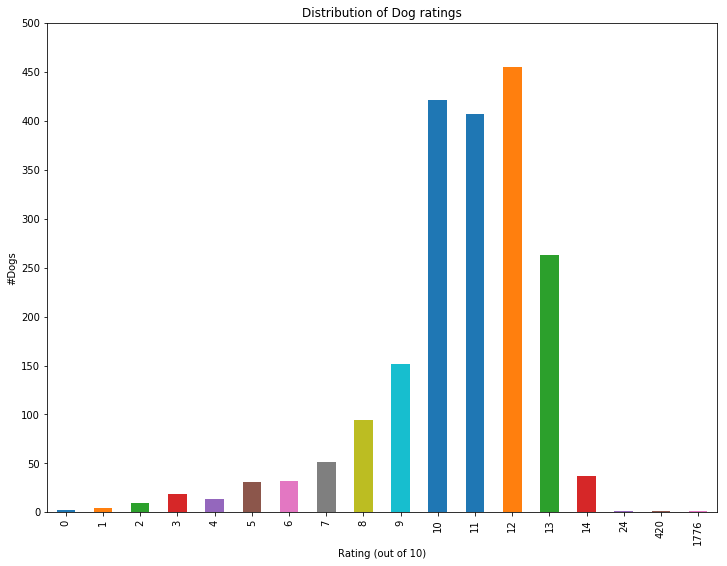

In [68]:
ax = df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Distribution of Dog ratings')
ax.set_xlabel("Rating (out of 10)")
ax.set_ylabel("#Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
plt.savefig('dist_rating')

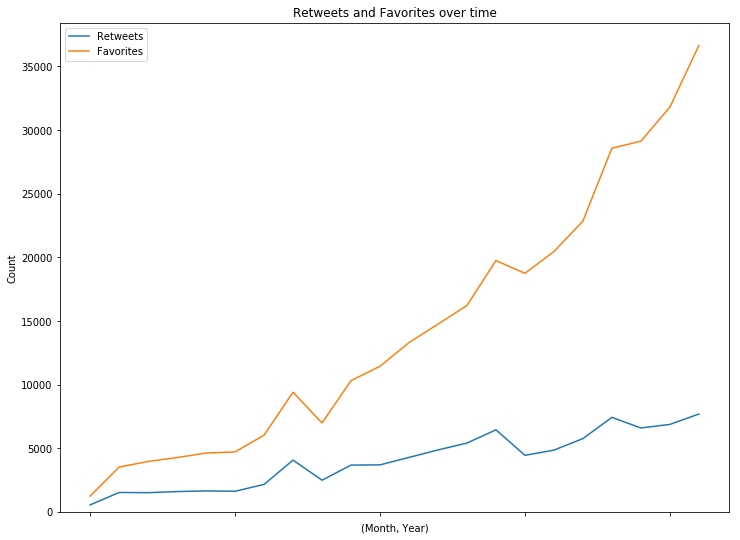

In [69]:
plt.subplots(1, sharex=True)
df.retweets.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorites.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweets and Favorites over time')
plt.ylabel('Count')
plt.xlabel('(Month, Year)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('retweetsandfavorites')